# Car Price Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("car data.csv")

In [3]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [6]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [7]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Owner','Fuel_Type','Seller_Type','Transmission']]

In [11]:
final_dataset.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type,Seller_Type,Transmission
0,2014,3.35,5.59,27000,0,Petrol,Dealer,Manual
1,2013,4.75,9.54,43000,0,Diesel,Dealer,Manual
2,2017,7.25,9.85,6900,0,Petrol,Dealer,Manual
3,2011,2.85,4.15,5200,0,Petrol,Dealer,Manual
4,2014,4.60,6.87,42450,0,Diesel,Dealer,Manual


In [12]:
final_dataset['Current_Year']=2020

In [13]:
final_dataset.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type,Seller_Type,Transmission,Current_Year
0,2014,3.35,5.59,27000,0,Petrol,Dealer,Manual,2020
1,2013,4.75,9.54,43000,0,Diesel,Dealer,Manual,2020
2,2017,7.25,9.85,6900,0,Petrol,Dealer,Manual,2020
3,2011,2.85,4.15,5200,0,Petrol,Dealer,Manual,2020
4,2014,4.60,6.87,42450,0,Diesel,Dealer,Manual,2020


In [14]:
final_dataset['no_of_year']=final_dataset['Current_Year']-final_dataset['Year']

In [15]:
final_dataset.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type,Seller_Type,Transmission,Current_Year,no_of_year
0,2014,3.35,5.59,27000,0,Petrol,Dealer,Manual,2020,6
1,2013,4.75,9.54,43000,0,Diesel,Dealer,Manual,2020,7
2,2017,7.25,9.85,6900,0,Petrol,Dealer,Manual,2020,3
3,2011,2.85,4.15,5200,0,Petrol,Dealer,Manual,2020,9
4,2014,4.60,6.87,42450,0,Diesel,Dealer,Manual,2020,6


In [16]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [17]:
final_dataset.drop(['Current_Year'],axis=1,inplace=True)

In [18]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [19]:
final_dataset

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,1,0,0,1
297,4.00,5.90,60000,0,5,0,1,0,1
298,3.35,11.00,87934,0,11,0,1,0,1
299,11.50,12.50,9000,0,3,1,0,0,1


In [20]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


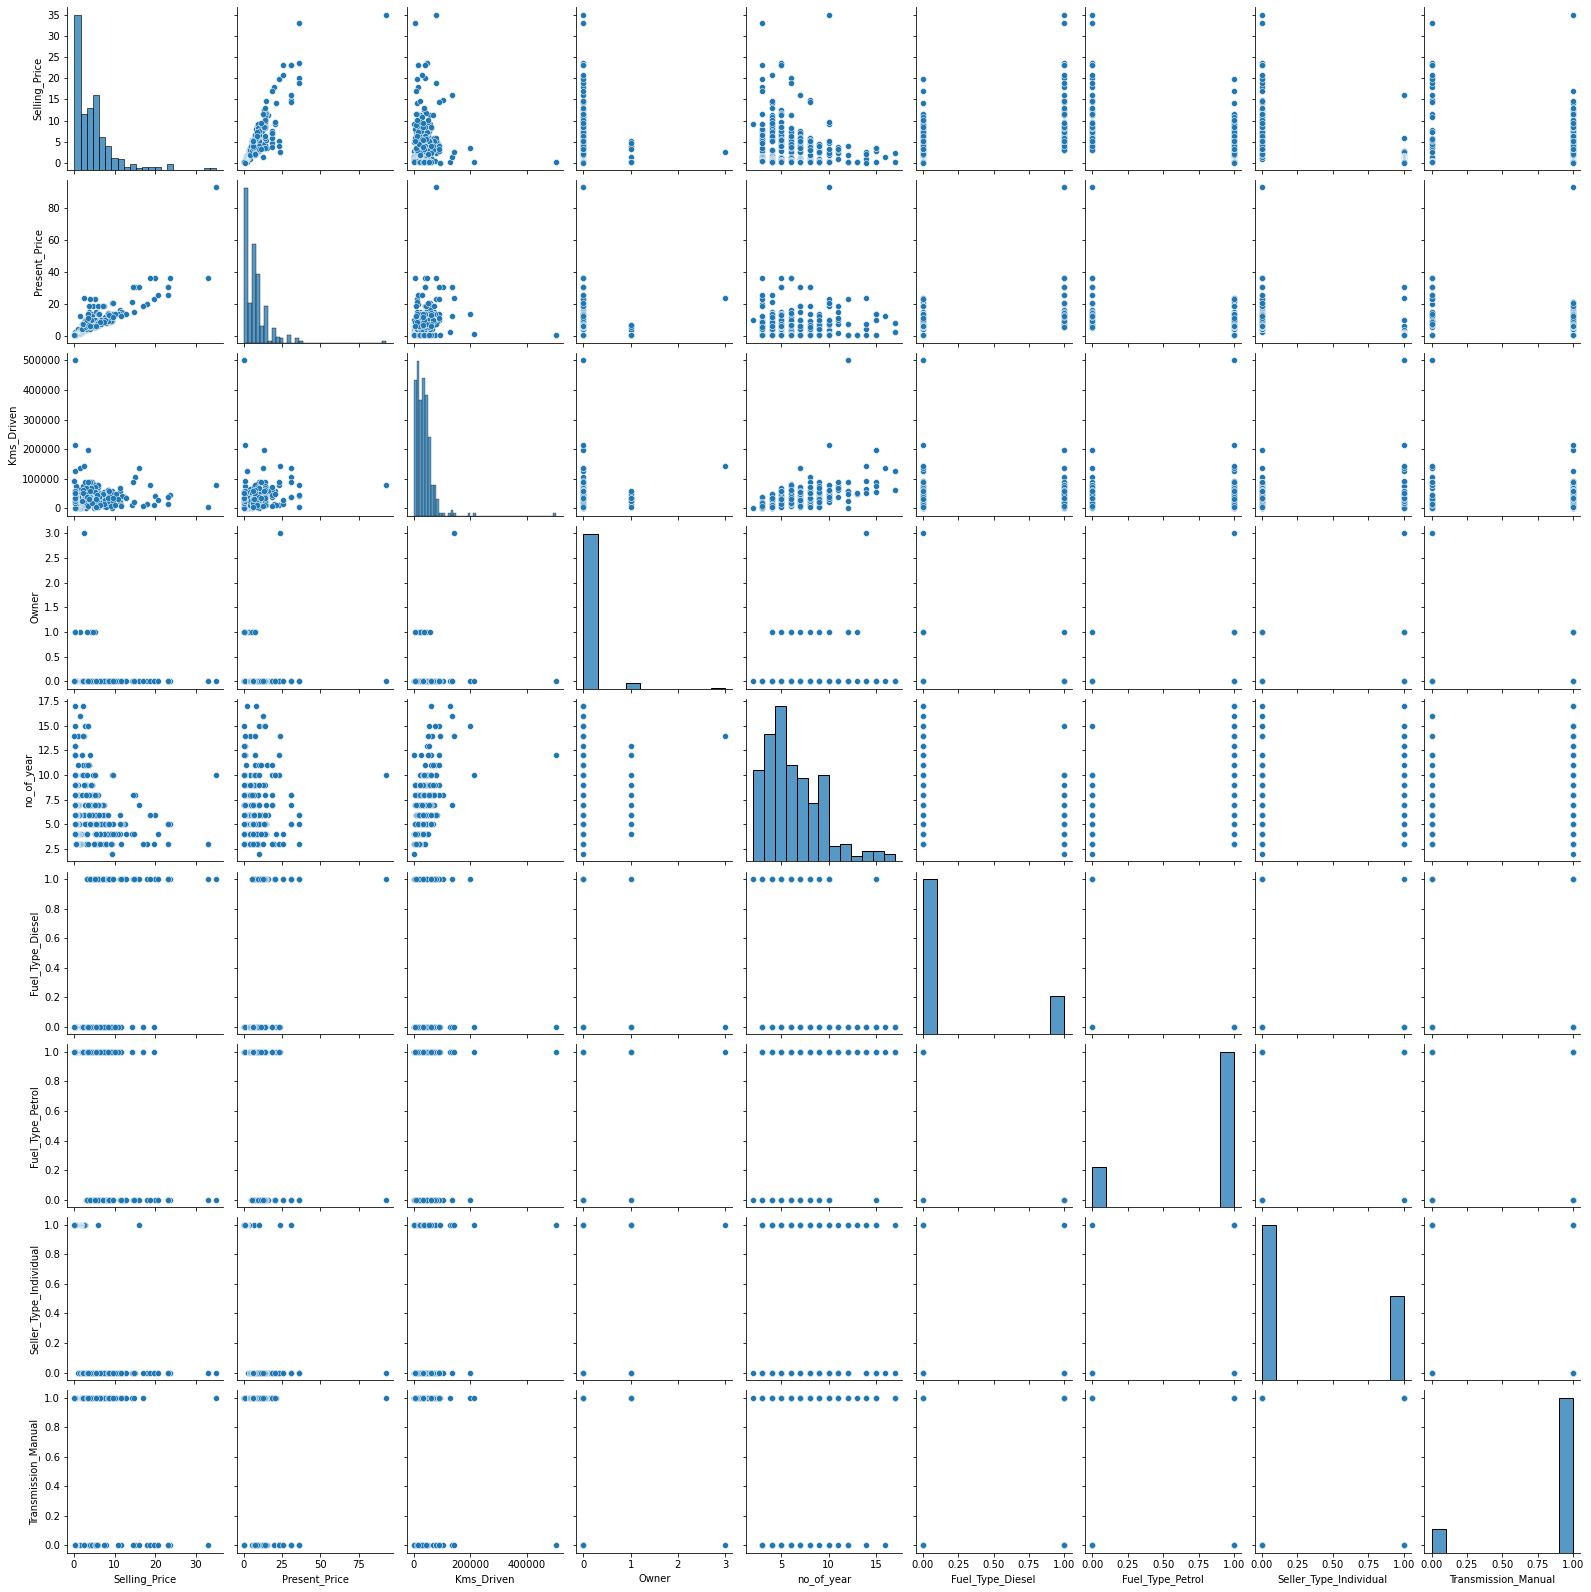

In [21]:
sns.pairplot(final_dataset)

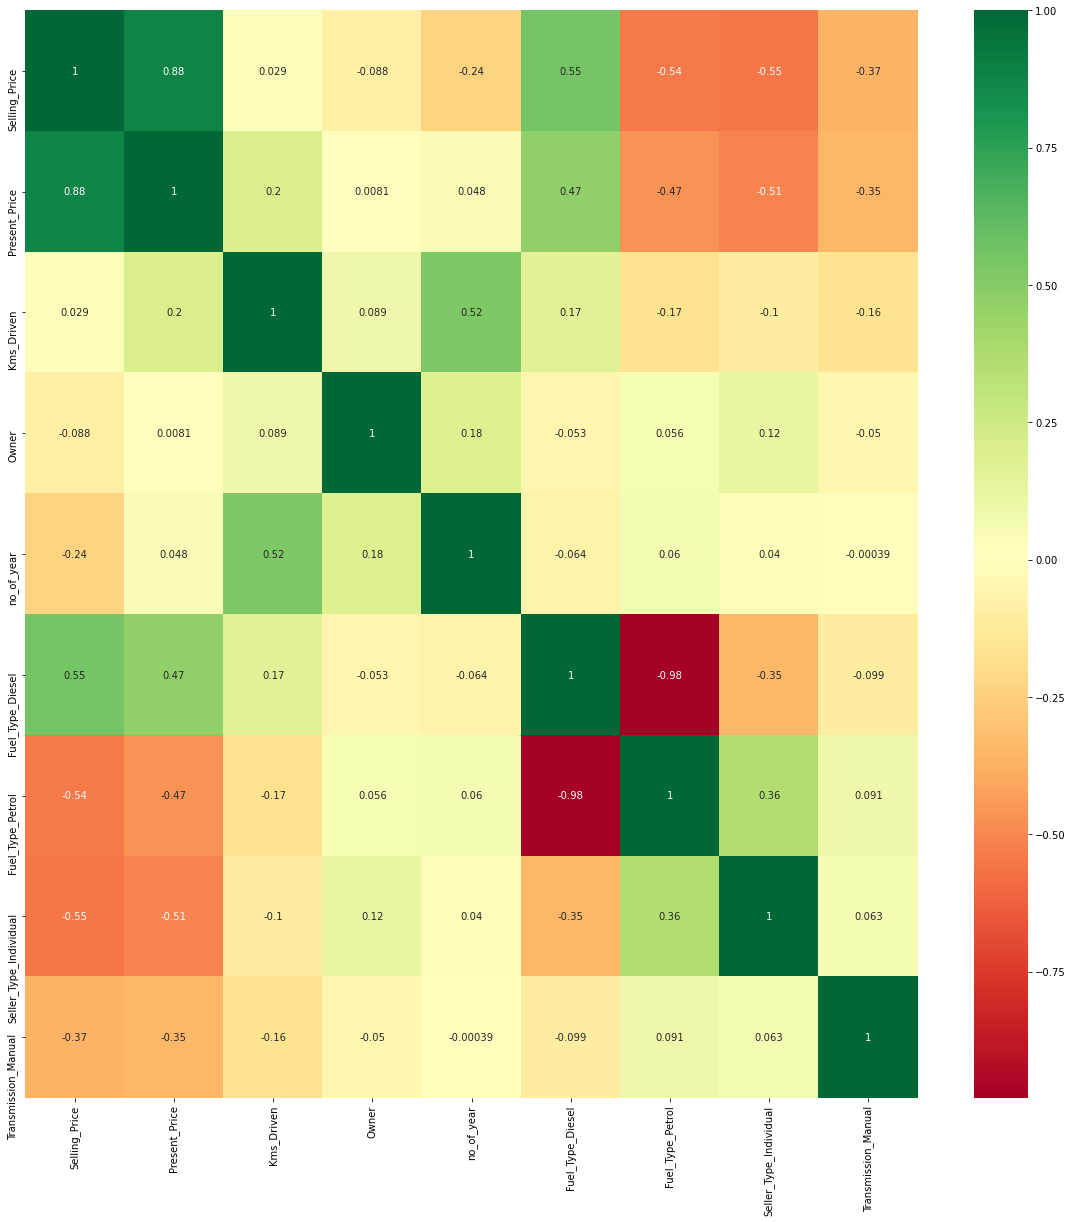

In [22]:
corrmat=final_dataset.corr()
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) #plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
x=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

# To find highly corelated values use of ExtraTreesRegressor

In [24]:
from sklearn.ensemble import ExtraTreesRegressor

In [25]:
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [26]:
print(model.feature_importances_)

[0.35425031 0.04034304 0.00042074 0.07757583 0.23210899 0.01289772
 0.13271081 0.14969256]


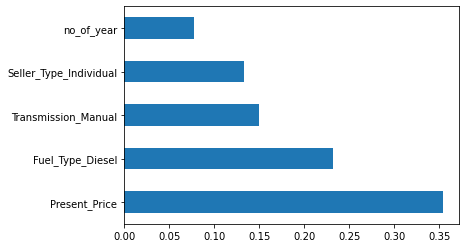

In [27]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns) 
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## Splitting of datasets into training and testing datasets

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [30]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [31]:
rfr.predict(x_test)

array([ 0.2615, 10.3273,  4.8238,  1.0825,  5.5735,  4.6023,  5.7625,
        0.3694, 23.2516, 12.1445,  2.8745, 10.6441,  0.2276,  9.541 ,
        2.881 ,  0.5654,  2.6495,  9.1074,  3.5522,  7.8547,  9.149 ,
        0.4558,  1.1165,  2.375 ,  0.7323,  3.2125,  0.2829, 20.2538,
        0.4231,  5.6832,  0.5883,  5.843 ,  5.2955,  0.1563,  0.6989,
        0.7838,  1.1455,  0.4258,  2.9795,  4.056 ,  1.524 ,  2.881 ,
       12.4675,  0.4204,  0.6465,  5.0165,  0.2647,  0.5728,  8.4065,
        7.978 ,  2.8625,  3.58  ,  0.8317,  4.8675,  0.4482,  0.5134,
        6.8419,  0.5116,  7.6475,  2.421 ,  5.9425])

In [32]:
#Randomized SearchCV
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_sample_split=[2,5,10,15,100]
min_sample_leaf=[1,2,5,10]

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


## Use of RandomizedSearchCV to find best parameteres we can also use GridSearchCV but it is slower than RandomizedSearchCV

In [33]:
#  Create the random Grid
random_grid={'n_estimators':n_estimators,
             'max_depth':max_depth,'min_sample_split':min_sample_split,'min_sample_leaf':min_sample_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_sample_split': [2, 5, 10, 15, 100], 'min_sample_leaf': [1, 2, 5, 10]}


In [39]:
rf_random=RandomizedSearchCV(estimator=rfr,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [35]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1100, min_sample_split=15, min_sample_leaf=5, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter min_sample_split for estimator RandomForestRegressor(n_estimators=1100). Check the list of available parameters with `estimator.get_params().keys()`.

In [41]:
predictions=rfr.predict(x_test)
print(predictions)

[ 0.2615 10.3273  4.8238  1.0825  5.5735  4.6023  5.7625  0.3694 23.2516
 12.1445  2.8745 10.6441  0.2276  9.541   2.881   0.5654  2.6495  9.1074
  3.5522  7.8547  9.149   0.4558  1.1165  2.375   0.7323  3.2125  0.2829
 20.2538  0.4231  5.6832  0.5883  5.843   5.2955  0.1563  0.6989  0.7838
  1.1455  0.4258  2.9795  4.056   1.524   2.881  12.4675  0.4204  0.6465
  5.0165  0.2647  0.5728  8.4065  7.978   2.8625  3.58    0.8317  4.8675
  0.4482  0.5134  6.8419  0.5116  7.6475  2.421   5.9425]


C:\Users\Aparna Yadav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

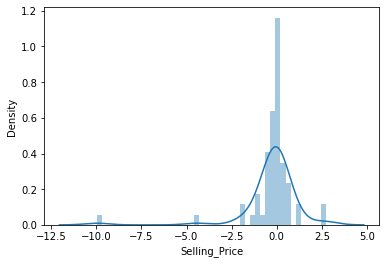

In [37]:
sns.distplot(y_test-predictions)

C:\Users\Aparna Yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

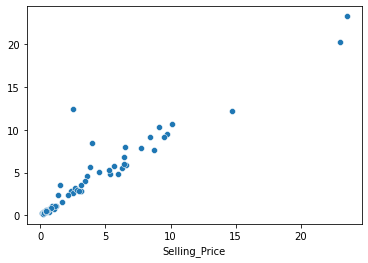

In [38]:
sns.scatterplot(y_test,predictions)